In [32]:
#Load Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.max_columns=None

In [42]:
# #Read all csvs 
meddf = pd.read_csv('medicareappended.csv')
usreg = pd.read_csv('US_regions.csv')
# df1 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2014.csv')
# df2 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2015.csv')
# df3 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2016.csv')
meddf.head(10)

,Unnamed: 0,NPI,state,claim_count,specialty,opioid_count,Year
0,0,1447268107,NY,18,Pharmacist,0.0,2013
1,1,1174856348,CA,84,Clinic/Center,0.0,2013
2,2,1720181522,FL,29,Internal Medicine,0.0,2013
3,3,1821285826,FL,27,Urology,0.0,2013
4,4,1457520132,WA,28,Dentist,0.0,2013
5,5,1649426404,ME,17,Dentist,0.0,2013
6,6,1134381320,CA,13,Psychiatry & Neurology,0.0,2013
7,7,1437329034,LA,29,Ophthalmology,0.0,2013
8,8,1194830265,NY,55,Family Practice,0.0,2013
9,9,1437186798,CA,48,Internal Medicine,0.0,2013


In [44]:
usreg.head(10)

,state,Region,States
0,AL,Southeast,Alabama
1,AK,Pacific West:,Alaska
2,AZ,Pacific West:,Arizona
3,AR,Southeast,Arkansas
4,CA,Pacific West:,California
5,CO,Plains Region,Colorado
6,CT,Northeast,Connecticut
7,DE,Northeast,Delaware
8,DC,Northeast,District of Columbia
9,FL,Southeast,Florida


In [4]:
# #Create Column for year
# df['Year'] = 2013
# df1['Year'] = 2014
# df2['Year'] = 2015
# df3['Year'] = 2016

In [5]:
# #Append Files together 
# df_apped = df.append(df2, sort=True)
# dfp = df_apped.append(df1, sort= True)
# dfpp = dfp.append(df3, sort=True)

In [6]:
#Notice all the missing values or blanks in the data...replace with zero 
meddf.count()

Unnamed: 0      4356141
NPI             4356141
state           4356141
claim_count     4356141
specialty       4356141
opioid_count    4356141
Year            4356141
dtype: int64

In [7]:
#Only selecting the columns I want 
df_clean = meddf[['state','claim_count','specialty','opioid_count','Year']]
df_clean.head(10)

,state,claim_count,specialty,opioid_count,Year
0,NY,18,Pharmacist,0.0,2013
1,CA,84,Clinic/Center,0.0,2013
2,FL,29,Internal Medicine,0.0,2013
3,FL,27,Urology,0.0,2013
4,WA,28,Dentist,0.0,2013
5,ME,17,Dentist,0.0,2013
6,CA,13,Psychiatry & Neurology,0.0,2013
7,LA,29,Ophthalmology,0.0,2013
8,NY,55,Family Practice,0.0,2013
9,CA,48,Internal Medicine,0.0,2013


In [47]:
grouped_states2 = df_clean.groupby('state').sum()
grouped_states2
#Create a sepreate dataframe that only take that column 
statesdf = grouped_states2[['claim_count','opioid_count']]
statesdf['opioid_percent'] = (statesdf['opioid_count'] / statesdf['claim_count'])*100
statesdf = statesdf.sort_values(by = 'state')
statereg = pd.merge(usreg, statesdf, how='inner', on='state')
statereg.drop(statereg.columns[2], axis=1, inplace=True)
statereg.head(5)

,state,Region,claim_count,opioid_count,opioid_percent
0,AL,Southeast,115794089,8863384.0,7.654436
1,AK,Pacific West:,5230506,351955.0,6.728890
2,AZ,Pacific West:,94787867,6455743.0,6.810727
3,AR,Southeast,69987485,4563590.0,6.520580
4,CA,Pacific West:,540764543,28581006.0,5.285296


In [48]:
df_clean.to_csv('medicareappendednonpi.csv')
statereg.to_csv('prescripton_by_state.csv')

claim_count  opioid_count  opioid_percent
Region         state                                           
Midwest        IA        66678136     3145671.0        4.717695
               IL       197690646     9456315.0        4.783390
               IN       128655678     8344105.0        6.485610
               KY       118305655     6922290.0        5.851191
               MI       188957466    13459007.0        7.122771
               MN        84355241     4310318.0        5.109722
               MO       139856845     8181974.0        5.850249
               OH       245694579    13400529.0        5.454141
               WI       100792973     5846080.0        5.800087
Northeast      CT        62513688     2711277.0        4.337093
               DC         7919185      330035.0        4.167537
               DE        14906983      943638.0        6.330174
               MA       126585898     5331860.0        4.212049
               MD        69265535     4107493.0        5.930068
               ME        27347246     1644138.0        6.012079
               NH        20810198     1197609.0        5.754914
               NJ       140130609     5867800.0        4.187379
               NY       374783852    11340947.0        3.025997
               PA       290440297    14244307.0        4.904384
               RI        24864051      946361.0        3.806142
               VA       120525134     6825002.0        5.662721
               VT        10388437      595068.0        5.728176
               WV        50867971     3043877.0        5.983877
Pacific West:  AK         5230506      351955.0        6.728890
               AZ        94787867     6455743.0        6.810727
               CA       540764543    28581006.0        5.285296
               HI        17279181      661579.0        3.828764
               ID        23658767     1785075.0        7.545089
               NV        35498988     2764859.0        7.788557
               OR        66130953     4829992.0        7.303678
               UT        28962347     2213278.0        7.641915
               WA        93583659     6460034.0        6.902951
Plains Region  CO        63113933     4595849.0        7.281830
               KS        55640883     3423616.0        6.153058
               MT        15963289     1057064.0        6.621843
               ND        14507322      652389.0        4.496964
               NE        36962402     1807574.0        4.890304
               NM        28303156     1815734.0        6.415306
               OK        68690696     5170384.0        7.527051
               SD        16421081      843900.0        5.139126
               TX       353870260    20356041.0        5.752402
               WY         6771330      410178.0        6.057569
Southeast      AL       115794089     8863384.0        7.654436
               AR        69987485     4563590.0        6.520580
               FL       417109281    21733926.0        5.210607
               GA       177810681    11030362.0        6.203430
               LA       102298869     6179779.0        6.040906
               MS        70981674     4371350.0        6.158421
               NC       209438168    12902634.0        6.160593
               SC        97107561     6092487.0        6.273957
               TN       161063362    11611303.0        7.209152

In [77]:
reggrpavg = statereg.groupby(by = "Region").mean()
reggrpavg['opioid_percent_avg'] = reggrpavg[['opioid_percent']]
reggrpavg1 = reggrpavg[['opioid_percent_avg']]
reggrpavg1

,opioid_percent_avg
Region,
Midwest,5.686095
Northeast,5.003042
Pacific West:,6.648430
Plains Region,6.033545
Southeast,6.381343


In [76]:
reggrpsum = statereg.groupby(by = 'Region').sum()
reggrpsum['opioid_percent_sum'] = reggrpsum[['opioid_percent']]
reggrpsum1 = reggrpsum[['opioid_percent_sum']]
reggrpsum1

,opioid_percent_sum
Region,
Midwest,51.174855
Northeast,70.042591
Pacific West:,59.835867
Plains Region,60.335454
Southeast,57.432083


In [78]:
regdata = pd.merge(reggrpsum1, reggrpavg1, how='inner', on='Region')
regdata.head(5)

,opioid_percent_sum,opioid_percent_avg
Region,,
Midwest,51.174855,5.686095
Northeast,70.042591,5.003042
Pacific West:,59.835867,6.648430
Plains Region,60.335454,6.033545
Southeast,57.432083,6.381343


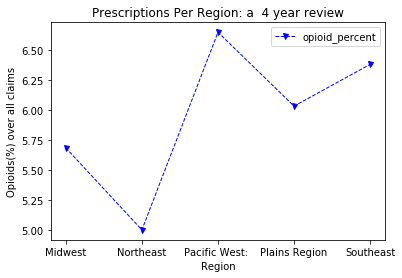

<Figure size 1440x1440 with 0 Axes>

In [89]:
# Generate an errorbar plot
# The 'yerr' argument refers to the error bar for each sample, oriented to the y-axis
#plt.errorbar(reggrp.index, reggrp["claim_count"], color='k', marker='d', markersize=5, linestyle='dashed', linewidth=1)
#plt.errorbar(reggrp.index, reggrp["opioid_count"], color='g', marker='s', markersize=5, linestyle='dashed', linewidth=1)
plt.errorbar(reggrp.index, reggrp["opioid_percent"], color='b', marker='v', markersize=5, linestyle='dashed', linewidth=1)
#plt.errorbar(meth.index, meth["2016.Methadone"], color='r', marker='o', markersize=5, linestyle='dashed', linewidth=1)
x_lim = len(reggrp.index)
# Chart title
plt.title("Prescriptions Per Region: a  4 year review")
# x label
plt.xlabel("Region")
# y label
plt.ylabel("Opioids(%) over all claims")
# legend 
plt.legend(loc='best')
plt.figure(figsize=(20,20))
plt.show()


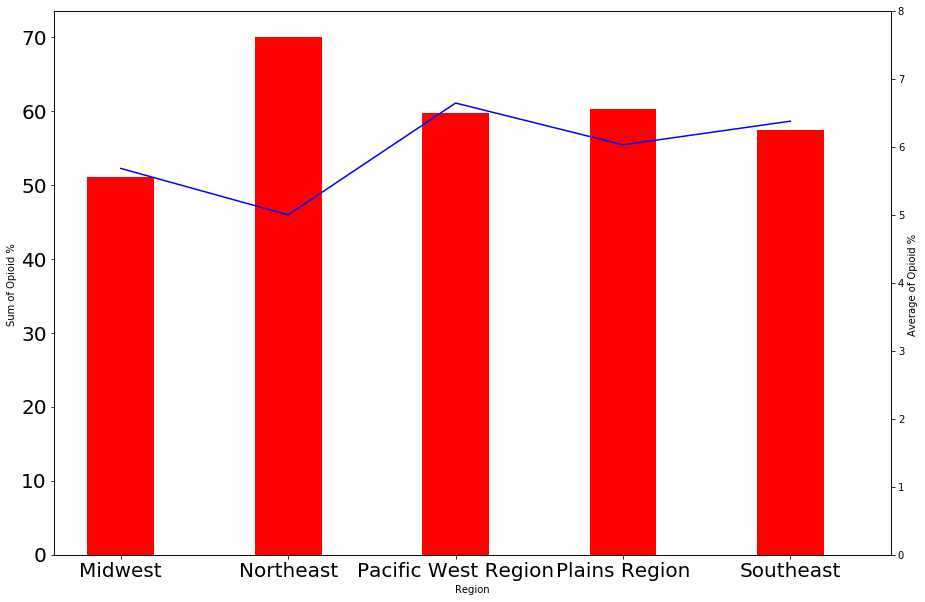

<Figure size 432x288 with 0 Axes>

In [97]:
width = 0.4
regdata['opioid_percent_sum'].plot(kind='bar', width = width, color = "red",figsize=(15, 10), fontsize = "20")
plt.ylabel('Sum of Opioid % ') 
regdata['opioid_percent_avg'].plot(secondary_y=True, color = "blue")
plt.ylabel('Average of Opioid % ')
plt.ylim(0.0, 8)

ax = plt.gca()
plt.xlim([-width, len(regdata)-width])
ax.set_xticklabels(('Midwest', 'Northeast', 'Pacific West Region', 'Plains Region', 'Southeast'))


plt.show()
plt.savefig('Opioids sum and average by region.jpeg') 

In [19]:
#Group by Year
#Reset the dataframes for both...column is not callable until you do so
claims_year = df_clean[['Year','claim_count']]
opioids_year = df_clean[['Year','opioid_count']]
grouped_cyears = claims_year.groupby('Year').sum().reset_index()
grouped_oyears = opioids_year.groupby('Year').sum().reset_index()

In [20]:
#Merge the datasets together...BOOM
year_merge = pd.merge(grouped_cyears, grouped_oyears)
year_merge['opioid_percent'] = (year_merge['opioid_count'] / year_merge['claim_count'])*100
year_merge.head(10)

,Year,claim_count,opioid_count,opioid_percent
0,2013,1367999818,78712328.0,5.753826
1,2014,1414071984,80282426.0,5.677393
2,2015,1447170686,78842061.0,5.448014
3,2016,1480972766,78145305.0,5.276620


In [21]:
#Create a sepreate dataframe that only take needed column 
year_percent = year_merge[['Year', 'opioid_percent']]
#df30 = df30.set_index('specialty')
year_percent.head(10)

,Year,opioid_percent
0,2013,5.753826
1,2014,5.677393
2,2015,5.448014
3,2016,5.276620


In [22]:
# Orient widths. Add labels, tick marks, etc.
xlabs = year_percent.loc[: ,'Year'].tolist()
xlabs

[2013, 2014, 2015, 2016]

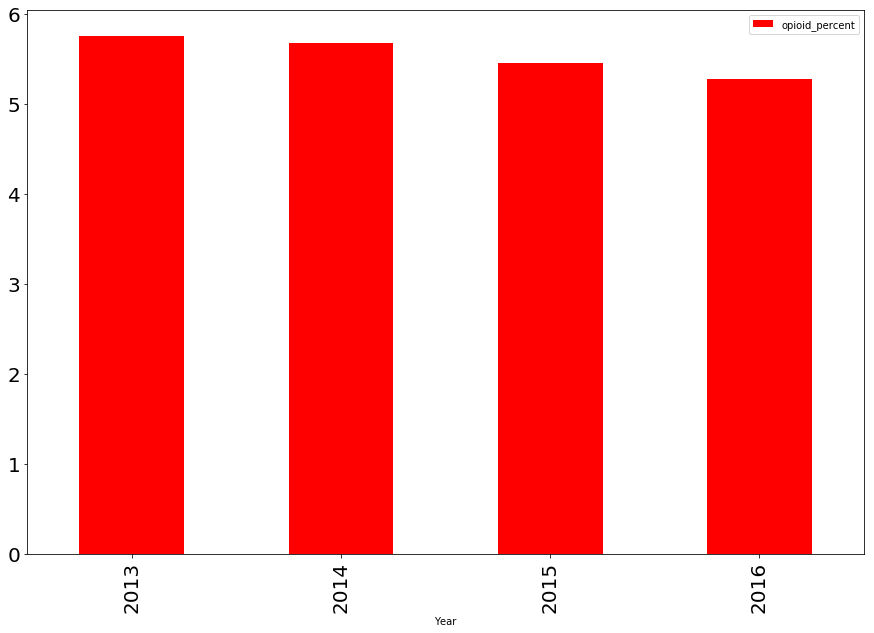

In [36]:
Fig1 = year_percent.plot("Year","opioid_percent", kind = 'bar',color='red', figsize=(15, 10), fontsize = "20")
plt.savefig('prescription_by_year.jpeg') 


In [9]:
#Group by Specialty
#Reset the dataframes for both...column is not callable until you do so
claims_special = df_clean[['specialty','claim_count']]
opioids_special = df_clean[['specialty','opioid_count']]
grouped_claims = claims_special.groupby('specialty').sum().reset_index()
grouped_opioid = opioids_special.groupby('specialty').sum().reset_index()

In [10]:
#Merge the datasets together...BOOM
special_merge = pd.merge(grouped_claims, grouped_opioid)
special_merge.head(10)

,specialty,claim_count,opioid_count
0,Acupuncturist,39919,1488.0
1,Addiction Medicine,674115,98965.0
2,Adult Companion,1679,0.0
3,Advanced Practice Dental Therapist,165,0.0
4,All Other Suppliers,210,0.0
5,Allergy/ Immunology,2663127,22737.0
6,Allergy/Immunology,7368676,62933.0
7,Alzheimer Center (Dementia Center),40,0.0
8,Ambulance Service Supplier,540,48.0
9,Ambulatory Surgical Center,4422,400.0


In [11]:
#Group by Specialty
#Reset the dataframes for both...column is not callable until you do so
claims_special = df_clean[['specialty','claim_count']]
opioids_special = df_clean[['specialty','opioid_count']]
grouped_claims = claims_special.groupby('specialty').sum().reset_index()
grouped_opioid = opioids_special.groupby('specialty').sum().reset_index()

In [12]:
#Create a column to show the percentage of opioids by overall drugs perscribed 
special_merge['opioid_percent'] = (special_merge['opioid_count'] / special_merge['claim_count'])*100
special_merge_df = pd.DataFrame(special_merge).sort_values(by ='opioid_percent', ascending = False)
special_100 = special_merge_df.head(100)
special_100.head(10)


,specialty,claim_count,opioid_count,opioid_percent
181,Pain Management,13759671,7833359.0,56.929842
116,Interventional Pain Management,16988702,9614500.0,56.593494
92,Hand Surgery,835455,462414.0,55.348762
12,Anesthesiology,19937443,10705790.0,53.696906
175,Orthopedic Surgery,28585000,13181847.0,46.114560
54,"Day Training, Developmentally Disabled Services",96,44.0,45.833333
194,Physical Medicine and Rehabilitation,28489929,11927966.0,41.867307
152,Neurosurgery,3773174,1537677.0,40.752878
159,"Nursing Facility, Other (Dmercs Only)",907,338.0,37.265711
30,Certified Registered Nurse Anesthetist (CRNA),47901,16448.0,34.337488


In [13]:
#Create a sepreate dataframe that only take that column 
df = special_100[['specialty', 'opioid_percent']]
df = df.set_index('specialty')
df

,opioid_percent
specialty,
Pain Management,56.929842
Interventional Pain Management,56.593494
Hand Surgery,55.348762
Anesthesiology,53.696906
Orthopedic Surgery,46.114560
"Day Training, Developmentally Disabled Services",45.833333
Physical Medicine and Rehabilitation,41.867307
Neurosurgery,40.752878
"Nursing Facility, Other (Dmercs Only)",37.265711


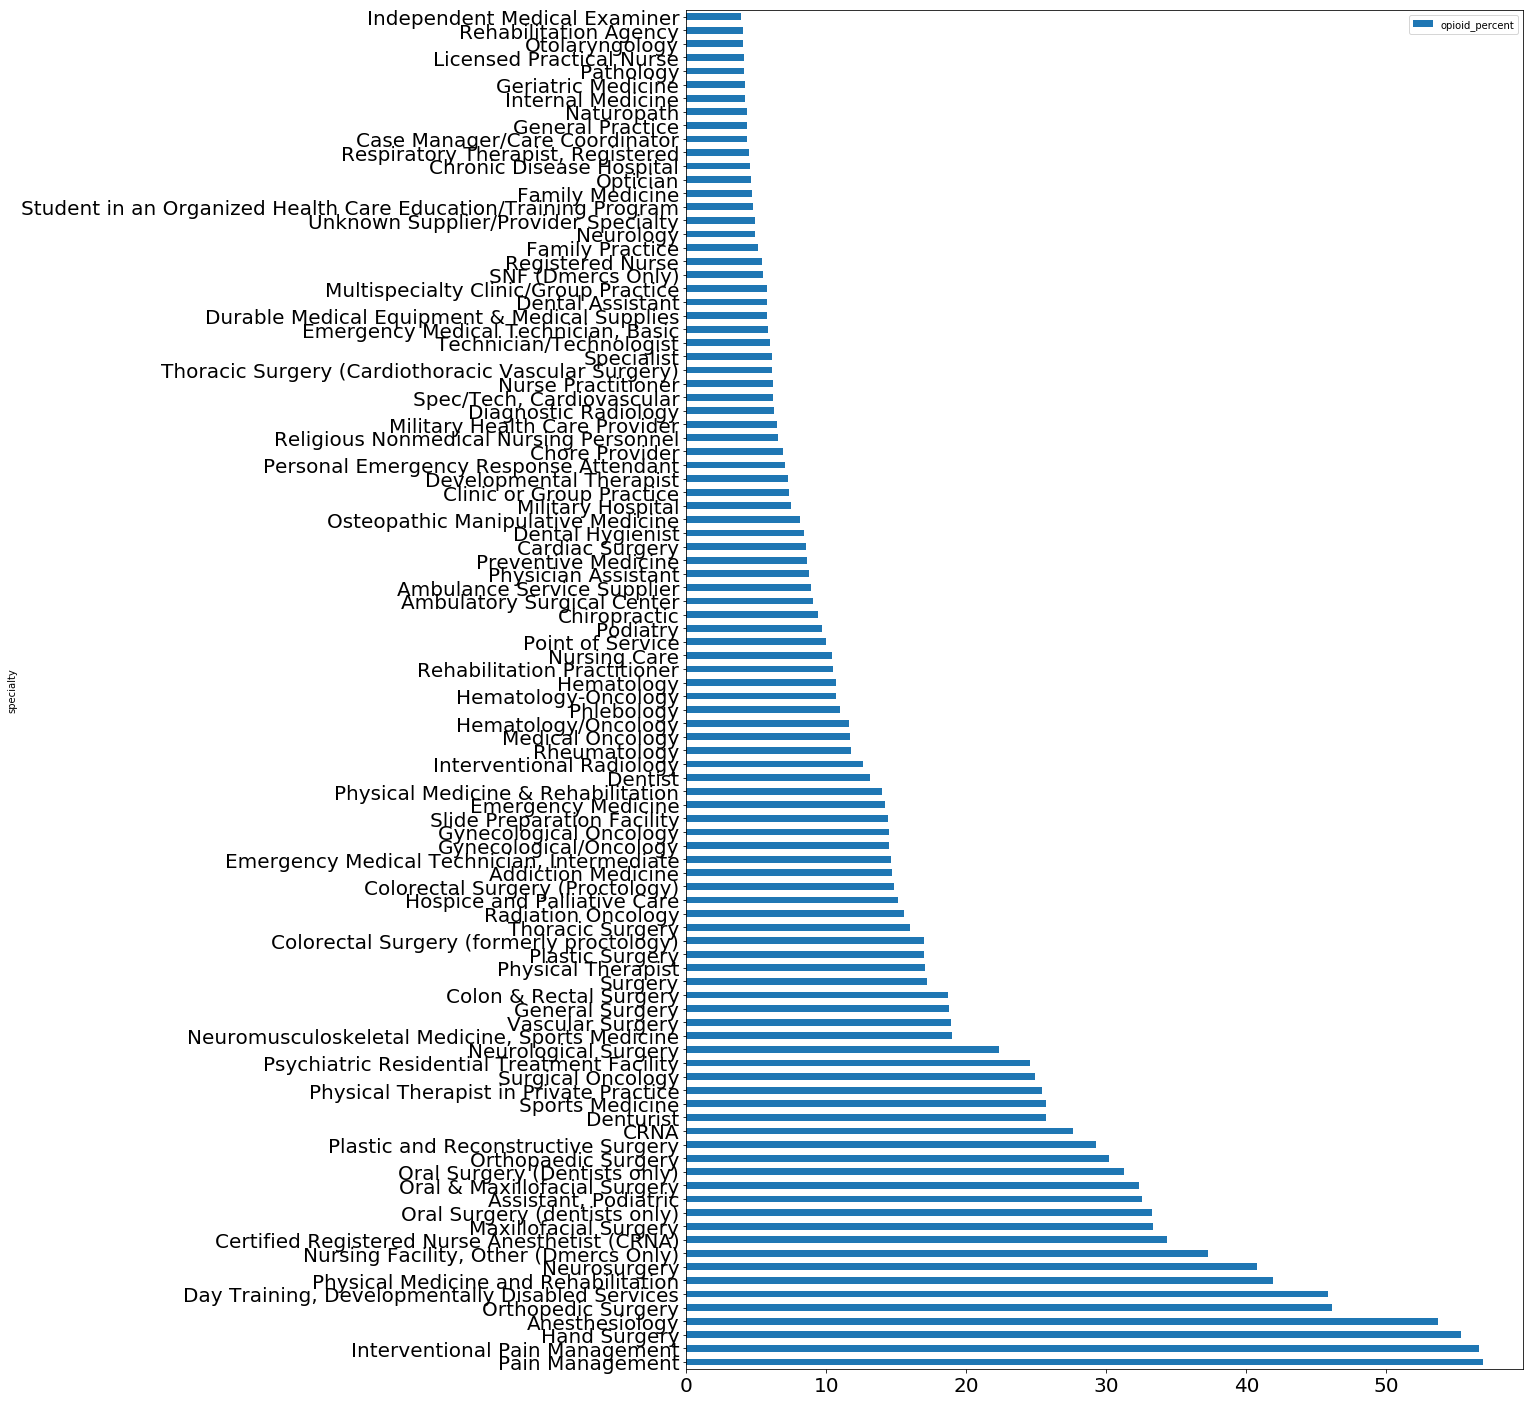

In [95]:
df.plot.barh(figsize=(15, 25), fontsize = "20")
plt.savefig('100 highest specialties.jpeg') 

In [15]:
special_30 = special_merge_df.head(30)
#Create a sepreate dataframe that only take that column 
df30 = special_30[['specialty', 'opioid_percent']]
df30 = df30.set_index('specialty')
df30.head(10)

,opioid_percent
specialty,
Pain Management,56.929842
Interventional Pain Management,56.593494
Hand Surgery,55.348762
Anesthesiology,53.696906
Orthopedic Surgery,46.114560
"Day Training, Developmentally Disabled Services",45.833333
Physical Medicine and Rehabilitation,41.867307
Neurosurgery,40.752878
"Nursing Facility, Other (Dmercs Only)",37.265711


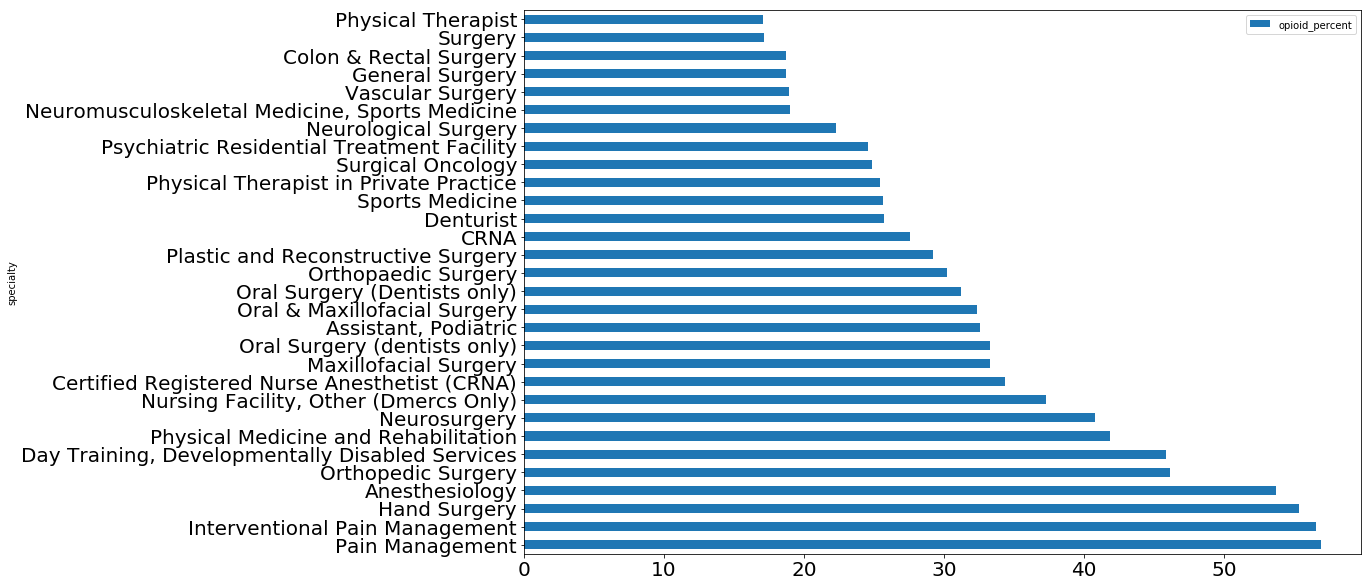

In [96]:
df30.plot.barh(figsize=(15, 10), fontsize = "20")
plt.savefig('30 highest specialties.jpeg') 
